# Beispiel: Hauptkomponentenanalyse Bremer Bürgerschaftswhal 2023

Dies ist ein Notebook, welches die [Hauptkomponentenanalyse](https://de.wikipedia.org/wiki/Hauptkomponentenanalyse) auf die Positionen der Parteien auf die Thesen zur Bremer Bürgerschaftswahl 2021 anwendet. Die Thesen und die Positionen wurden von der [Bundeszentrale für politische Bildung](https://www.bpb.de/) im Rahmen des [Wahl-O-Mats](https://www.bpb.de/themen/wahl-o-mat/) erstellt und veröffentlicht.

Zuerst werden alle benötigten Module importiert.

In [1]:
from IPython.display import display
from IPython.display import Markdown
import matplotlib.pyplot as plt
import numpy as np
from pca_wahl import utils
from sklearn.decomposition import PCA

In [2]:
plt.rcParams["figure.dpi"] = 200.

## Laden der Daten

Dann werden die Daten zur Bürgerschaftswahl über eine vordefinierte Funktion geladen.

In [3]:
data = utils.load_election("2023-05-14_hb")

## Nutzungsbedingungen

Zunächst seinen die Nutzungsbedingungen erwähnt.

In [4]:
print(data.note)

Hinweis zur Verwendung des Wahl-O-Mat-Datensatzes

Die Bundeszentrale für politische Bildung ist Urheber des nachfolgend veröffentlichten „Wahl-O-Mat-Datensatzes“. 
Die Veröffentlichung des Datensatzes dient lediglich dem Zugang zu den in ihm enthaltenen Informationen. 
Jede Nutzung des Datensatzes, egal welcher Art, wird untersagt. Die Schranken des Urheberrechts durch gesetzlich erlaubte Nutzung bleiben hiervon unberührt.

Eine Ausnahme gilt nur für die Analyse des Datensatzes zu wissenschaftlichen oder journalistischen Zwecken sowie für die Veröffentlichung der Ergebnisse dieser Analyse. 
Dabei muss jederzeit klar erkennbar sein, dass die Bundeszentrale für politische Bildung nicht Urheber dieser Analyse ist.

Explizit untersagt ist in diesem Rahmen die Nutzung des Datensatzes für die Erstellung von Angeboten, in deren Rahmen– ähnlich dem Wahl-O-Mat – Nutzerinnen und Nutzer sich auf Basis der eigenen Positionen ihre Nähe zu den Parteien anzeigen oder errechnen lassen können.

Bei Fr

## Disclaimer

An dieser Stelle sei erähnt, dass diese Analyse zu **wissenschaftlichen und journalistischen Zwecken** erstellt und veröffentlicht wurde. Es besteht **keine Verbindung zur Bundeszentrale für politische Bildung**.

## Bereinigung

Der Datensatz kann nun nach Belieben über eine vordefinierte Funktion bereinigt werden. Zum Beispiel um Parteien zu entfernen, die aus Gründen alle Thesen mit "neutral" beantwortet haben und damit nicht sinnvoll in einer Hauptkomponentenanalyse dargestellt werden können.

In [5]:
remove = [
    "dieBasis",
    "Partei für schulmedizinische Verjüngungsforschung",
]

In [6]:
data = utils.remove_party_from_data(data, remove=remove)

Folgende Parteien verbleiben im Datensatz:

In [7]:
data.parties

array(['CDU', 'SPD', 'GRÜNE', 'DIE LINKE', 'FDP', 'BIW', 'Die PARTEI',
       'PIRATEN', 'GFA', 'MLPD', 'MERA25', 'ÖDP', 'Tierschutzpartei',
       'Volt'], dtype=object)

### Hilfsvariablen

Nun lassen sich Hilfsvariablen definieren.

In [8]:
N_par, N_the = data.X.shape

In [9]:
N_komp = np.minimum(N_par, N_the)

In [10]:
N_max = 10
parties_short = []
for party in data.parties:
    if len(party) > N_max:
        parties_short.append(party[:N_max]+"...")
    else:
        parties_short.append(party)

## Die Thesen

Diese Thesen waren teil des Wahl-O-Mats:

In [11]:
md = []
for i in range(data.statements.shape[0]):
    md.append("* **These {:d}: {}** <br/> {}".format(i+1, data.statements[i], data.statements_long[i]))
display(Markdown("\n".join(md)))

* **These 1: Vertiefung der Außenweser** <br/> Die Außenweser soll für große Schiffe weiter vertieft werden.
* **These 2: Autofreie Innenstädte** <br/> Die Innenstädte von Bremen und Bremerhaven sollen autofrei sein.
* **These 3: Mietpreisbremse abschaffen** <br/> Die Mietpreisbremse in Bremen soll abgeschafft werden.
* **These 4: Solaranlagen auf Dächern** <br/> Das Land Bremen soll die Einrichtungen von Solaranlagen auf Dächern finanziell fördern.
* **These 5: Schulnoten** <br/> Schülerinnen und Schüler sollen schon ab der 3. Klasse durch Schulnoten beurteilt werden.
* **These 6: Krankenhäuser in öffentlicher Trägerschaft** <br/> In Bremen und Bremerhaven sollen mehr Krankenhäuser in öffentlicher Trägerschaft sein.
* **These 7: Verdachtsunabhängige Personenkontrollen** <br/> Die Polizei soll verdachtsunabhängige Personenkontrollen durchführen dürfen.
* **These 8: Frauenquote** <br/> Für Führungspositionen von landeseigenen Betrieben soll es eine verbindliche Frauenquote von mindestens 50 Prozent geben.
* **These 9: Obdachlose** <br/> Das Campieren von Obdachlosen an zentralen öffentlichen Orten soll unterbunden werden.
* **These 10: Rüstungsgüter** <br/> Über die Häfen des Landes Bremen sollen weiterhin Rüstungsgüter ausgeführt werden dürfen.
* **These 11: Schuldenbremse** <br/> Das Land Bremen soll die Begrenzung der Neuverschuldung („Schuldenbremse“) weiterhin einhalten.
* **These 12: Letztes Kita-Jahr verpflichtend** <br/> Das letzte Kita-Jahr vor der Einschulung soll für alle Kinder verpflichtend sein.
* **These 13: Aufarbeitung der kolonialen Vergangenheit** <br/> Das Land soll ein Zentrum zur Aufarbeitung der kolonialen Vergangenheit Bremens und Bremerhavens einrichten.
* **These 14: Senator für Digitalisierung** <br/> In der bremischen Landesregierung soll es eine Senatorin oder einen Senator für Digitalisierung geben.
* **These 15: Silvesterfeuerwerk** <br/> Privates Silvesterfeuerwerk soll erlaubt bleiben.
* **These 16: Geschlechter sprachlich abbilden** <br/> In der öffentlichen Verwaltung des Landes sollen sprachliche Formen genutzt werden, die neben männlichen und weiblichen auch weitere Geschlechter abbilden.
* **These 17: Gewerbesteuer** <br/> Die Gewerbesteuer soll gesenkt werden.
* **These 18: Abschiebung ausreisepflichtiger Ausländer** <br/> Das Land Bremen soll ausreisepflichtige Ausländerinnen und Ausländer konsequent abschieben.
* **These 19: Fahrradwege** <br/> Es sollen mehr Straßenflächen in Fahrradwege umgewandelt werden.
* **These 20: Kostenloses Mittagessen** <br/> Das Mittagessen an Ganztagsschulen soll für alle Schülerinnen und Schüler kostenlos sein.
* **These 21: Taser für Polizei** <br/> Bremer Polizeikräfte sollen im Streifendienst mit Elektroschockpistolen („Tasern“) ausgerüstet werden.
* **These 22: Alten- und Pflegeheime** <br/> Im Land Bremen sollen mehr Alten- und Pflegeheime in öffentlicher Trägerschaft sein.
* **These 23: Verfassungsschutz** <br/> Das Landesamt für Verfassungsschutz Bremen soll aufgelöst werden.
* **These 24: Bürgergeld** <br/> Empfängerinnen und Empfängern von Bürgergeld sollen vom ersten Tag an Leistungen gekürzt werden können, wenn sie Jobangebote ablehnen.
* **These 25: Frauentag** <br/> Der Internationale Frauentag am 8. März soll gesetzlicher Feiertag im Land Bremen werden.
* **These 26: Fünfprozenthürde** <br/> Die Fünfprozenthürde bei den Wahlen zur Bremischen Bürgerschaft soll beibehalten werden.
* **These 27: Fachkräfte aus dem Ausland** <br/> Das Land Bremen soll Fachkräfte aus dem Ausland anwerben. 
* **These 28: G9 an Gymnasien** <br/> An allen Gymnasien soll das Abitur wieder nach neun Jahren (G9) abgelegt werden.
* **These 29: Senkung der Grunderwerbsteuer** <br/> Beim Kauf von Wohneigentum für die eigene Nutzung soll die Grunderwerbsteuer gesenkt werden.
* **These 30: Kopftuch** <br/> Beschäftigte im öffentlichen Dienst sollen ein Kopftuch tragen dürfen.
* **These 31: 30 Stunden Wochenarbeitszeit** <br/> Bremen soll sich dafür einsetzen, dass die Wochenarbeitszeit bei vollem Lohnausgleich auf 30 Stunden verkürzt wird.
* **These 32: Förderzentren** <br/> Alle Förderzentren („Förderschulen“) für Schülerinnen und Schüler mit Behinderung sollen erhalten bleiben.
* **These 33: Straßenbahn Obernstraße** <br/> Die Straßenbahn soll aus der Obernstraße in die Martinistraße verlegt werden.
* **These 34: Sinti und Roma** <br/> Kultur und Sprache der Sinti und Roma sollen durch das Land stärker finanziell gefördert werden.
* **These 35: Bremer Ausbildungsfonds** <br/> Alle Unternehmen sollen sich an den Kosten der allgemeinen Berufsausbildung (Bremer Ausbildungsfonds) beteiligen müssen.
* **These 36: Müllabfuhr und Straßenreinigung** <br/> Müllabfuhr und Straßenreinigung in Bremen sollen vollständig in öffentlicher Hand sein.
* **These 37: Aufgesetztes Parken** <br/> Das aufgesetzte Parken auf Gehwegen soll in mehr Straßen des Landes Bremen erlaubt werden.
* **These 38: Alkoholverbot** <br/> Im Umfeld des Bremer Hauptbahnhofs soll ein generelles Alkoholverbot gelten.

Auf diese Thesen konnten die Parteien mit "stimme zu", "stimme nicht zu" und "neutral" antworten. Die Antworten wurde für diese Analyse in die Ganzzahlen $1$, $-1$ und $0$ konvertiert. Damit spannen die Parteien einen $N$-dimensionalen Raum auf, wobei $N$ die Anzahl der Thesen ist.

## Korrelationsmatrix

Aus den Daten kann nun eine [Korrelationsmatrix](https://de.wikipedia.org/wiki/Korrelationsmatrix) erstellt werden, welche sich wie folgt darstellen lässt, wobei ein blauer Wert Korrelation und ein roter Wert Antikorrelation bedeutet. Ein weißer Wert bedeutet keine Korrelation.

**Beispiel 1:**  
Der Wert $\left(13, 8\right)$ ist blau. Das bedeutet die Thesen $13$ und $8$ korrelieren. Stimmt eine Partei der These _"Das Land soll ein Zentrum zur Aufarbeitung der kolonialen Vergangenheit Bremens und Bremerhavens einrichten."_ zu bzw. nicht zu, stimmt sie oftmals auch der These _"Für Führungspositionen von landeseigenen Betrieben soll es eine verbindliche Frauenquote von mindestens 50 Prozent geben."_ zu bzw. nicht zu.

**Beispiel 2:**  
Der Wert $\left(5, 2\right)$ ist rot. Das bedeutet die Thesen $5$ und $2$ antikorrelieren. Stimmt eine Partei der These _"Schülerinnen und Schüler sollen schon ab der 3. Klasse durch Schulnoten beurteilt werden."_ zu bzw. nicht zu, stimmt sie im Gegensatz oftmals der These _"Die Innenstädte von Bremen und Bremerhaven sollen autofrei sein."_ nicht zu bzw. zu.

Die Diagonale ist tiefblau, weil die Thesen natürlich mit sich selbst korrelieren.

In [12]:
P = np.corrcoef(data.X.T)

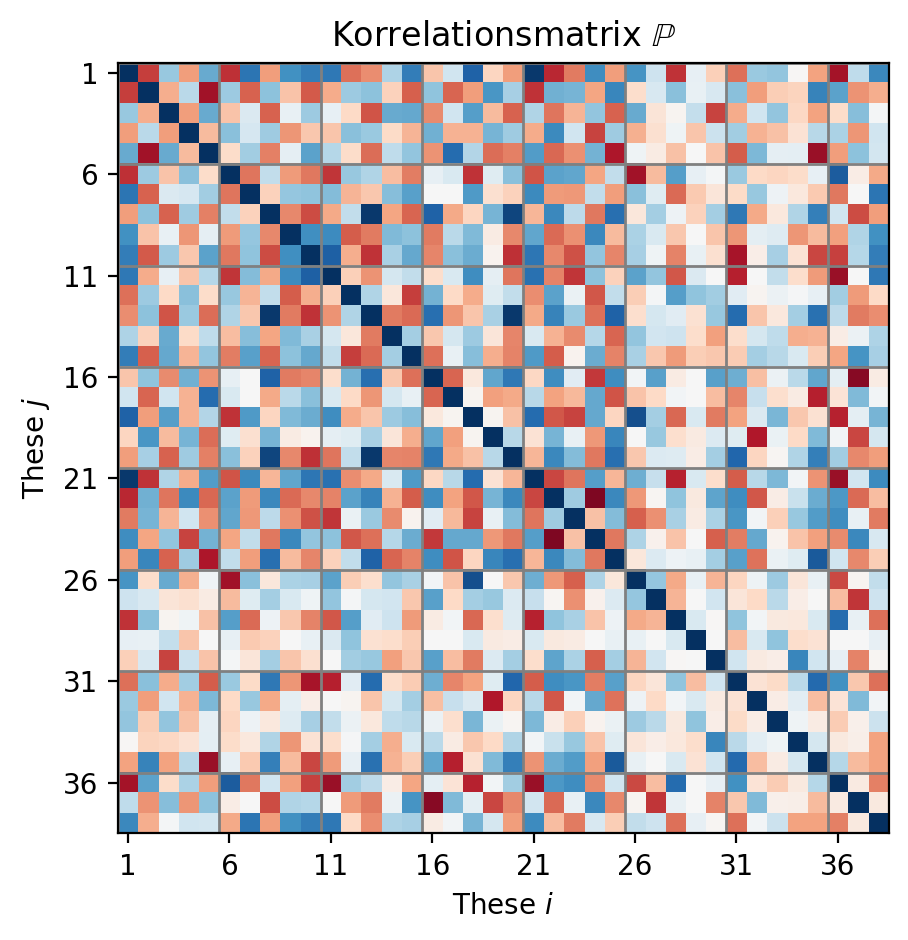

In [13]:
fig, ax = plt.subplots()
ax.set_aspect(1)
ax.imshow(P, vmin=-1, vmax=1, cmap="RdBu")
ax.set_title("Korrelationsmatrix $\mathbb{P}$")
ticks = np.arange(0, N_the+1, 5)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(ticks+1)
ax.set_yticklabels(ticks+1)
ax.hlines(ticks-0.5, -0.5, N_the-0.5, lw=1, color="gray")
ax.vlines(ticks-0.5, -0.5, N_the-0.5, lw=1, color="gray")
ax.set_xlabel("These $i$")
ax.set_ylabel("These $j$")
fig.tight_layout()

## Kovarianzmatrix

Die [Kovarianzmatrix](https://de.wikipedia.org/wiki/Kovarianzmatrix) ist ähnlich zur Korrelationsmatrix, wobei zusätzlich die Streuung der Parteipositionen pro These einen Einfluss hat.

Dies ist besonders auf der Diagonalen erkennbar, welche jetzt unterschiedliche Blautöne hat. Die Parteipositionen zu Thesen mit dunklerem Blauton weißen eine größere Streuung bzw. Varianz auf als Thesen mit hellerem Blauton. These $4$ (_"Das Land Bremen soll die Einrichtungen von Solaranlagen auf Dächern finanziell fördern."_) hat einen helleren Blauton als These $5$ (_"Schülerinnen und Schüler sollen schon ab der 3. Klasse durch Schulnoten beurteilt werden."_). Das bedeutet die Parteien haben zu These $4$ oftmals die gleiche Position (über diese Position selbst wird hier keine Aussage getroffen), wohingegen sie sich bei These $5$ deutlich unterscheiden. 

In [14]:
covX = np.cov(data.X.T)

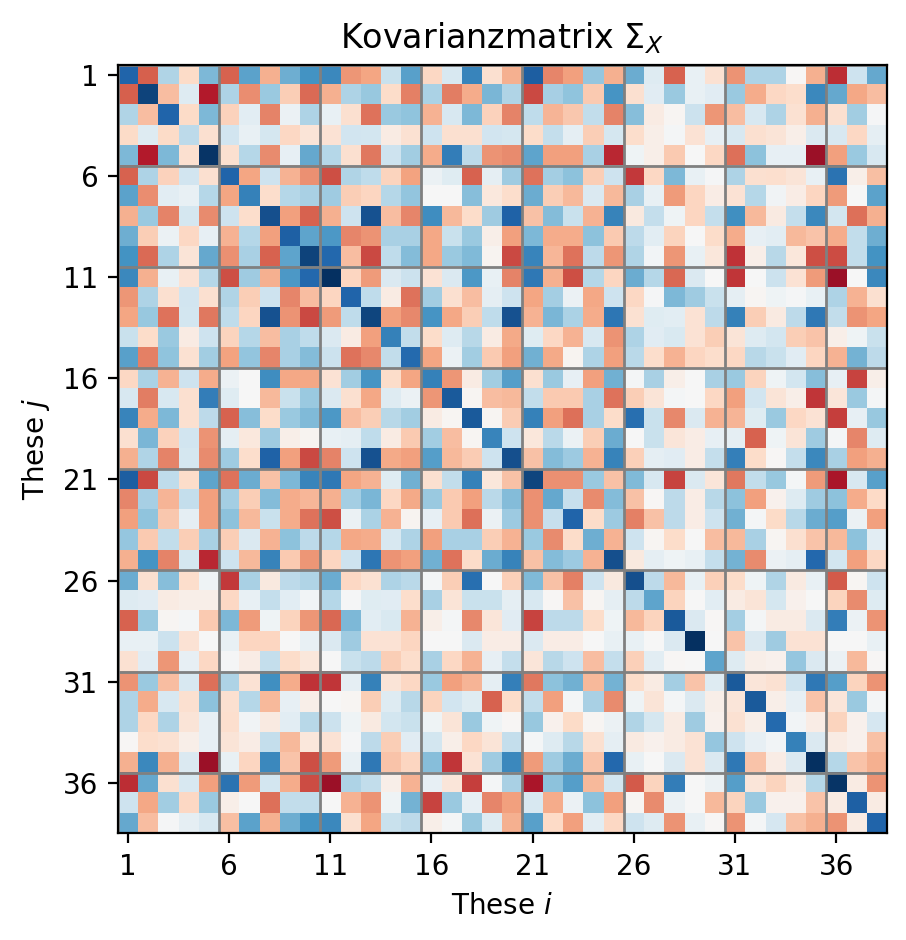

In [15]:
fig, ax = plt.subplots()
ax.set_aspect(1)
lim = np.abs(covX).max()
ax.imshow(covX, vmin=-lim, vmax=lim, cmap="RdBu")
ax.set_title("Kovarianzmatrix $\Sigma_X$")
ticks = np.arange(0, N_the+1, 5)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(ticks+1)
ax.set_yticklabels(ticks+1)
ax.hlines(ticks-0.5, -0.5, N_the-0.5, lw=1, color="gray")
ax.vlines(ticks-0.5, -0.5, N_the-0.5, lw=1, color="gray")
ax.set_xlabel("These $i$")
ax.set_ylabel("These $j$")
fig.tight_layout()

## Hauptkomponentenanalyse

Ziel der Hauptkomponentenanalyse ist es nun die Kovarianzmatrix zu diagonalisieren, sodass nur Einträge auf der Diagonalen existieren. Weiterhin sollen diese Einträge absteigend nach Varianz sortiert sein. In anderen Worten: Die Daten werden in ein neues Koordinatensystem transformiert, in welchem die Parteien auf der neuen $x$-Achse die größste Streuung aufweisen und in welchem die neuen Koordinatenachsen nicht korrelieren.

In [16]:
pca = PCA()
Y = pca.fit_transform(data.X)

Um den Erfolg der Hauptkomponentenanalyse zu bestätigen wird die Kovarianzmatrix im neuen Koordinatensystem geplottet. Und in der Tat hat die erste Hauptkomponente deutlich die größte Varianz (tiefblau), während die Hauptkomponenten nicht miteinander korrelieren (weiß).

In [17]:
covY = np.cov(Y.T)

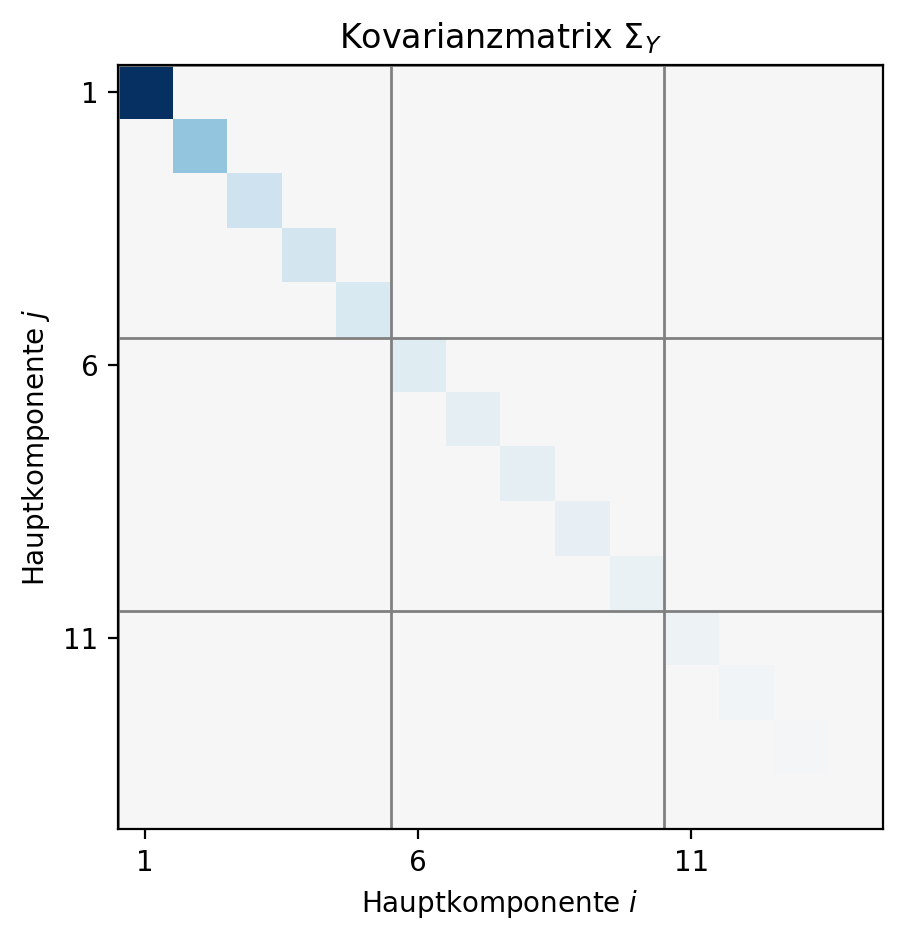

In [18]:
fig, ax = plt.subplots()
ax.set_aspect(1)
lim = np.abs(covY).max()
ax.imshow(covY, vmin=-lim, vmax=lim, cmap="RdBu")
ax.set_title("Kovarianzmatrix $\Sigma_Y$")
ticks = np.arange(0, N_komp+1, 5)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(ticks+1)
ax.set_yticklabels(ticks+1)
ax.hlines(ticks-0.5, -0.5, N_komp-0.5, lw=1, color="gray")
ax.vlines(ticks-0.5, -0.5, N_komp-0.5, lw=1, color="gray")
ax.set_xlabel("Hauptkomponente $i$")
ax.set_ylabel("Hauptkomponente $j$")
fig.tight_layout()

### Varianzbeiträge

Weiterhin lässt sich bestimmen, wieviel die einzelnen Hauptkomponenten zur Gesamtvarianz beitragen. Die erste Hauptkomponente trägt fast $40\,\%$ zur Gesamtvarianz bei, die zweite Hauptkomponente über $15\,\%$. Gemeinsam tragen beide Komponente über $55\,\%$ zur Gesamtvarianz bei.

In [19]:
expl_var_ratio = pca.explained_variance_ratio_

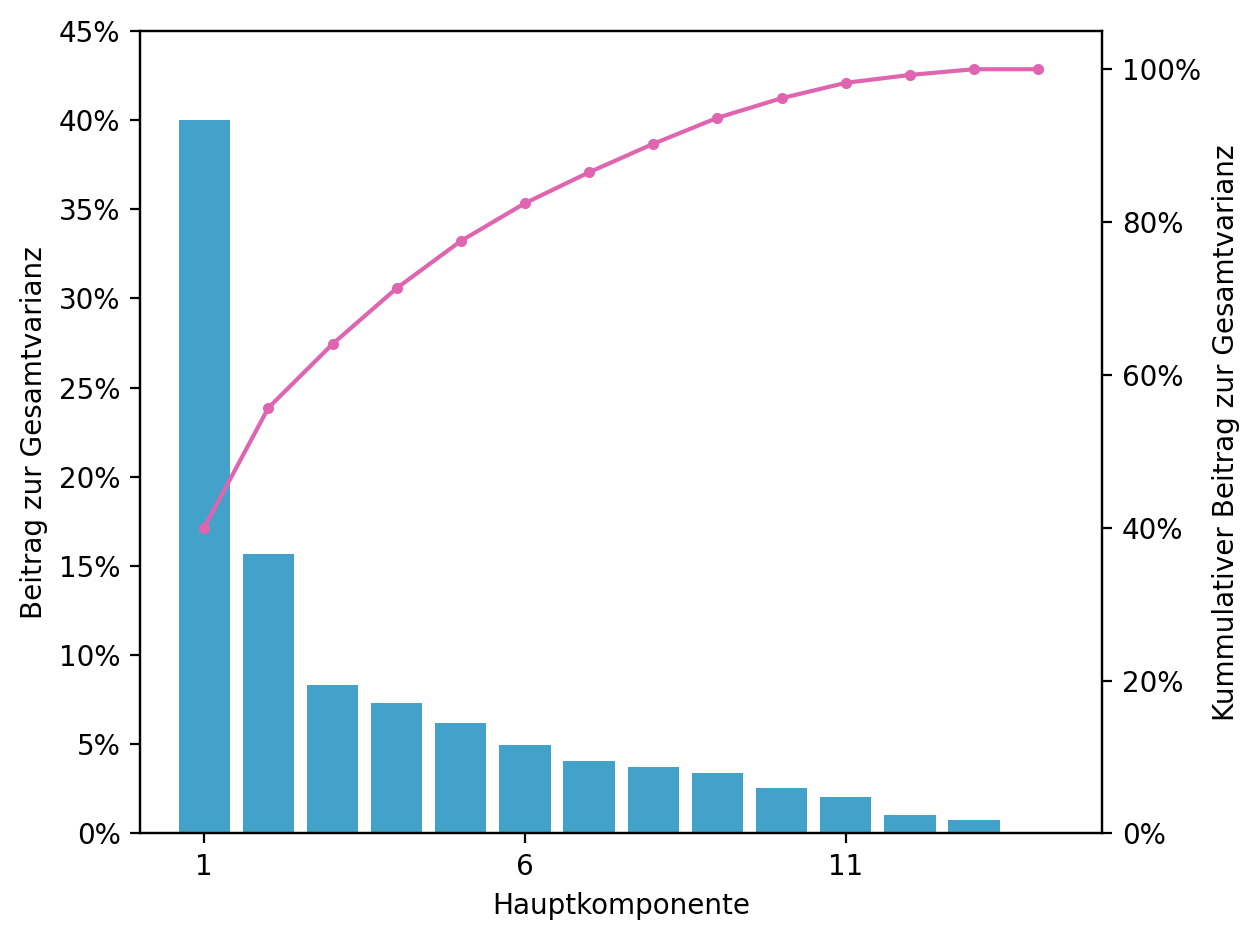

In [20]:
fig, ax = plt.subplots()
ax.bar(np.arange(N_komp)+1, expl_var_ratio, color="#43a2ca")
ax.set_xlabel("Hauptkomponente")
ax.set_ylabel("Beitrag zur Gesamtvarianz")
ax.set_xlim(0, N_komp+1)
ticks = np.arange(0, N_komp+1, 5)+1
ax.set_xticks(ticks)
ax.set_xticklabels(ticks)
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(["{:.0f}%".format(100*t) for t in ax.get_yticks()])
axr = ax.twinx()
axr.plot(np.arange(N_komp)+1, expl_var_ratio.cumsum(), ".-", c="#df65b0")
axr.set_ylabel("Kummulativer Beitrag zur Gesamtvarianz")
axr.set_ylim(0., 1.05)
axr.set_yticks(np.arange(0., 1.1, 0.2))
axr.set_yticklabels(["{:.0f}%".format(100*t) for t in axr.get_yticks()])
fig.tight_layout()

### Reduzierte Darstellung

Da die ersten beiden Hauptkomponenten schon fast die Hälfte der Gesamtvarianz tragen, lässt sich das System auch zweidimensional nur mit diesen Komponenten darstellen, ohne dass allzu viel Information verloren geht.

**Hinweis:** Diese Darstellung ist nur bedingt dazu geeignet, die politischen Nähe von Parteien zu analysieren, das sie nur eine zwei-dimensionale Projektion ist und ca. $50\,\%$ der Variationsinformation "versteckt" ist. In anderen Worten: Der Abstand, den Parteien in dieser Darstellung einnehmen, ist als untere Schranke zu sehen. Sie können sehr viel weiter voneinander entfernt sein.

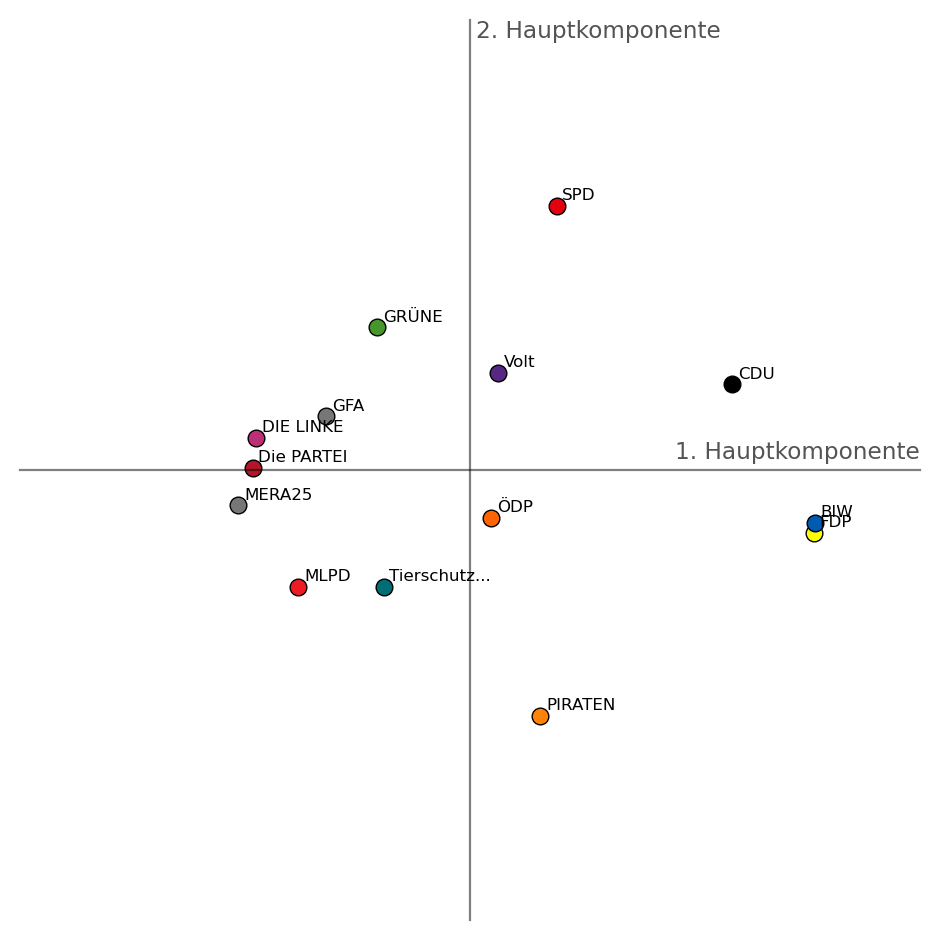

In [21]:
offset = 0.1
fig, ax = plt.subplots()
ax.set_aspect(1)
for i in range(N_par):
    ax.plot(Y[i, 0], Y[i, 1], "o", markersize=6, c=utils.color_dict[data.parties[i]], markeredgecolor="black", markeredgewidth=0.5)
    if True:
        ax.text(Y[i, 0]+offset, Y[i, 1]+offset, parties_short[i], fontsize=6)
lim = np.ceil(np.abs(Y).max())+1
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.set_xticks([])
ax.set_yticks([])
if True:
    ax.spines["left"].set_position("zero")
    ax.spines["bottom"].set_position("zero")
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    ax.spines["left"].set_alpha(0.5)
    ax.spines["bottom"].set_alpha(0.5)
    ax.text(lim, 0.1, "1. Hauptkomponente", va="bottom", ha="right", fontsize="small", alpha=0.67)
    ax.text(0.1, lim, "2. Hauptkomponente", va="top", ha="left", fontsize="small", alpha=0.67)
else:
    ax.axis("off")
ax.set_xticklabels([])
ax.set_yticklabels([])
fig.tight_layout()

Interessanterweise spiegelt die erste Hauptkomponente oftmals das klassische Links-Rechts-Spektrum wieder. Das ist besonders bemerkenswert, da die Hauptkomponentenanalyse eine rein mathematische Operation ist, die kein politisches Vorwissen beinhaltet. Es könnte vorkommen, dass die "x"-Achse invertiert ist – dann stehen die "rechten Parteien" links und die "linken Parteien" rechts. In diesem Fall könnte man die erste Hauptkomponente mit $-1$ multiplizieren, um die gewohnte Darstellung zu erhalten.

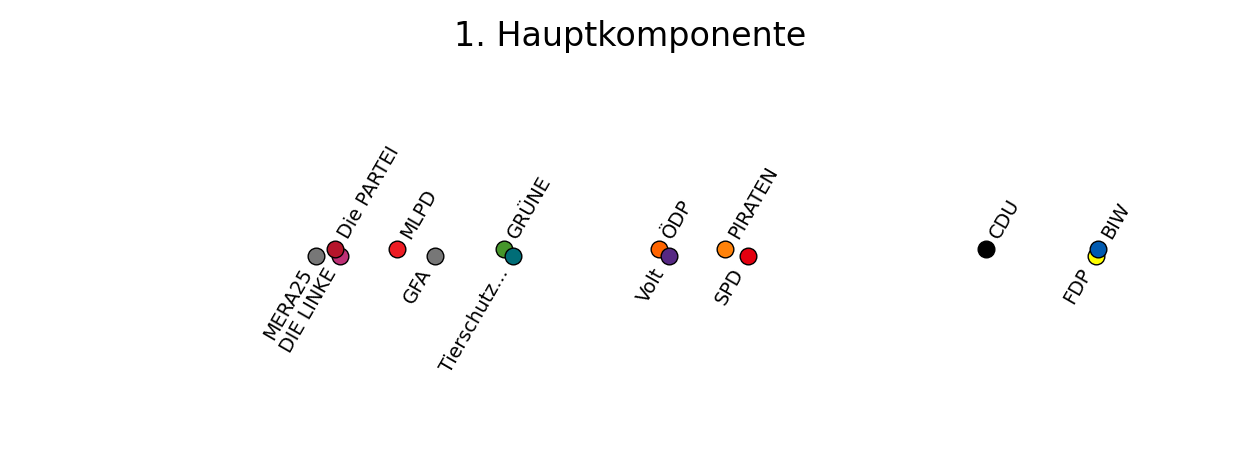

In [22]:
fig, ax = plt.subplots()
ax.set_aspect(1.)
i_sorted = np.argsort(Y[:, 0])
for i in range(N_par):
    up = (i==i_sorted).argmax()%2
    if up:
        ax.plot(Y[i, 0], 0.05, "o", markersize=6, c=utils.color_dict[data.parties[i]], markeredgecolor="black", markeredgewidth=0.5)
        ax.text(Y[i, 0], 0.15, parties_short[i], rotation=60, ha="left", va="bottom", fontsize="x-small")
    else:
        ax.plot(Y[i, 0], -0.05, "o", markersize=6, c=utils.color_dict[data.parties[i]], markeredgecolor="black", markeredgewidth=0.5)
        ax.text(Y[i, 0], -0.15, parties_short[i], rotation=60, ha="right", va="top", fontsize="x-small")
lim = np.ceil(np.abs(Y).max())+1
ax.set_xlim(-lim, lim)
ax.set_ylim(-2.5, 2.5)
ax.axis("off")
ax.set_title("1. Hauptkomponente")
fig.tight_layout()

### Beiträge zu den Hauptkomponenten

Da die Hauptkomponentenanalyse eine Transformation in ein neues Koordinatensystem ist, beinhalten die neuen Achsen (die Hauptkomponenten) Beiträge von allen These zu verschiedenen Anteilen. Es ist möglich darzustellen, welche Thesen den größten Anteil zu einer Hauptkomponente haben.

Der folgende Plot zeigt um welchen Betrag eine Partei in positiver Richtung entlang der ersten Hauptkomponente wandert, wenn sie einer These _zustimmt_. Wenn eine Partei also These $1$ (_"Die Außenweser soll für große Schiffe weiter vertieft werden."_) zustimmt, wandert sie nach rechts. Wenn eine Partei These $23$ (_"Das Landesamt für Verfassungsschutz Bremen soll aufgelöst werden."_), wandert sie nach links. Der Plot zeigt die Thesen, welche am stärksten bei Zustimmung die erste Hauptkomponente beeinflussen, also am polarisierendsten sind.

**Hinweis:** Bei Ablehnung einer These bedeutet das nicht, dass eine Partei um den selben Betrag in die entgegengesetzte Richtung wandert, und bei neutraler Haltung zu einer These bedeutet das nicht, dass eine Partei nicht entlang der Achse wandert. Der Grund dafür ist, dass der Schwerpunkt der Parteipositionen üblicherweise nicht auf _"neutrale Position"_ zentriert ist.

In [23]:
komp_the = np.empty((N_komp, N_the))
i_sorted = np.empty((N_komp, N_the), dtype=int)
for i in range(N_komp):
    komp_the[i, :] = (1. - data.X.mean(0)) * pca.components_.T[:, i]
    i_sorted[i, :] = komp_the[i, :].argsort()
    komp_the[i, :] = komp_the[i, :][i_sorted[i, :]]

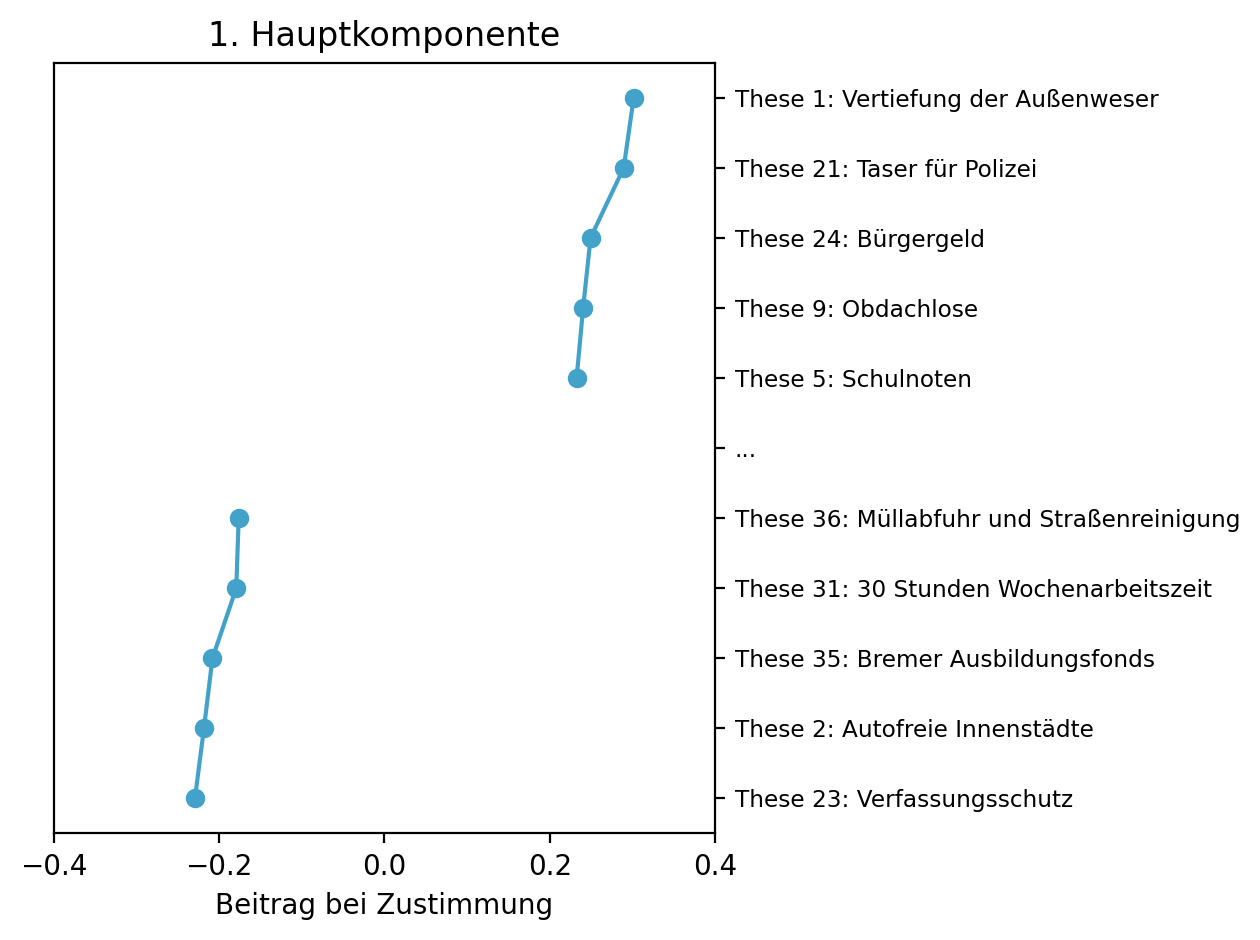

In [24]:
N_cut, N_pad = 5, 1
N_k = 1
lim = np.ceil(np.abs(10.*komp_the[N_k-1, :])).max()/10.
fig, ax = plt.subplots()
ax.plot(komp_the[N_k-1, :N_cut], np.arange(2*N_cut+N_pad)[:N_cut], "o-",  markersize=6, c="#43a2ca")
ax.plot(komp_the[N_k-1, -N_cut:], np.arange(2*N_cut+N_pad)[-N_cut:], "o-",  markersize=6, c="#43a2ca")
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_yticks(np.arange(2*N_cut+N_pad))
i_labels = list(i_sorted[N_k-1, :N_cut]) + list(i_sorted[N_k-1, -N_cut:])
ticklabels = ["These {:d}: {}".format(i+1, data.statements[i]) for i in i_labels[:N_cut]] + N_pad*["..."] + ["These {:d}: {}".format(i+1, data.statements[i]) for i in i_labels[-N_cut:]]
ax.set_yticklabels(ticklabels, fontsize="small")
ax.set_xlabel("Beitrag bei Zustimmung")
ax.set_xlim(-lim, lim)
ax.set_title("{:d}. Hauptkomponente".format(N_k))
fig.tight_layout()

Die erste Hauptkomponente repräsentiert also üblicherweise das "Links-Rechts-Spektrum". Aber was repräsentiert die zweite Hauptkomponente?

Das lässt sich an folgendem Plot ablesen. Das sind typischerweise polarisierende, Wahlkampf-spezifische Themen, die je nach Wahlkampf wechseln können. In diesem Beispiel wandert eine Partei nach oben in positive Richtung der zweiten Hauptkomponente wenn sie These $26$ (_"Die Fünfprozenthürde bei den Wahlen zur Bremischen Bürgerschaft soll beibehalten werden."_) zustimmt, und nach unten, wenn sie These $37$ (_"Das aufgesetzte Parken auf Gehwegen soll in mehr Straßen des Landes Bremen erlaubt werden."_) zustimmt.

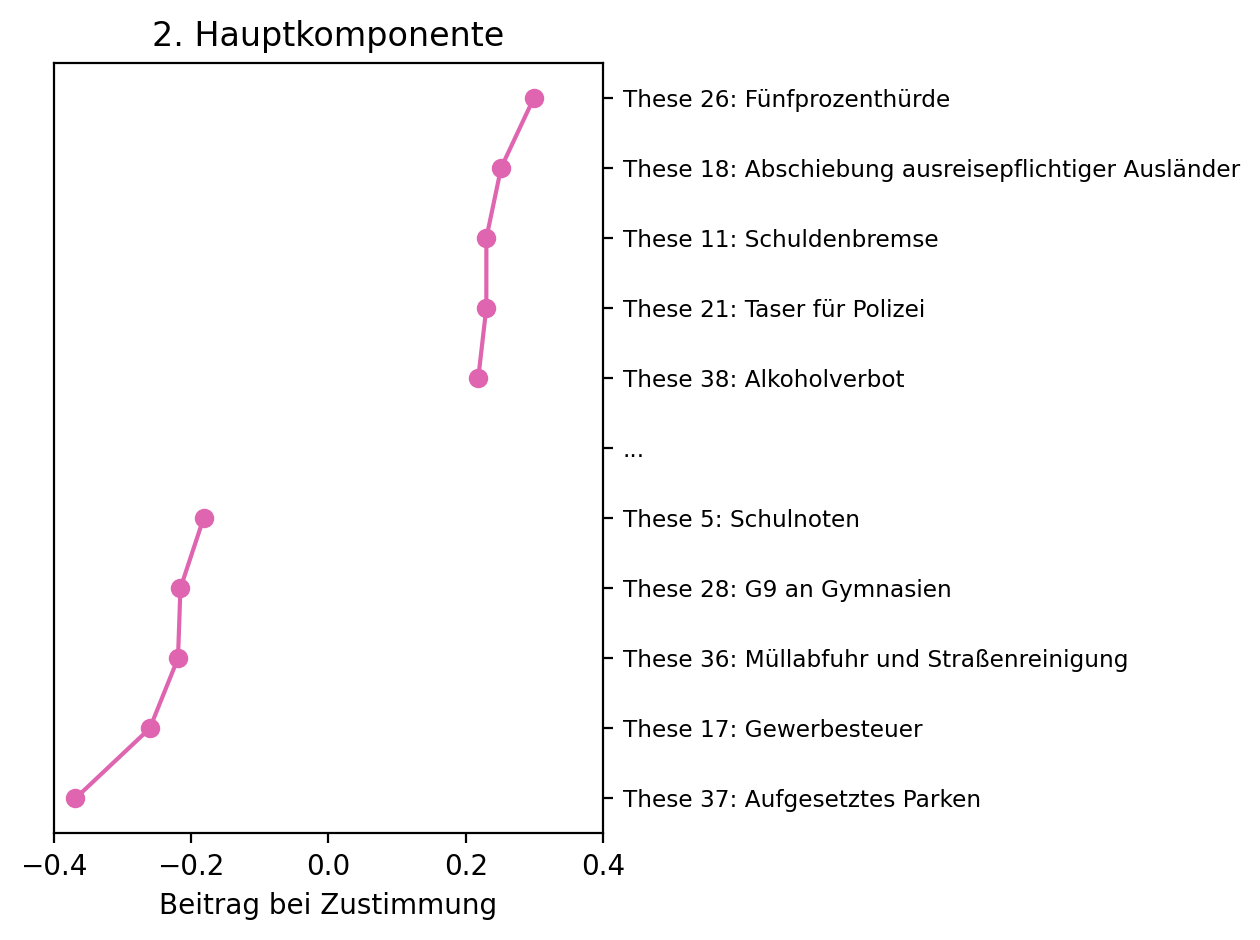

In [25]:
N_cut, N_pad = 5, 1
N_k = 2
lim = np.ceil(np.abs(10.*komp_the[N_k-1, :])).max()/10.
fig, ax = plt.subplots()
ax.plot(komp_the[N_k-1, :N_cut], np.arange(2*N_cut+N_pad)[:N_cut], "o-",  markersize=6, c="#df65b0")
ax.plot(komp_the[N_k-1, -N_cut:], np.arange(2*N_cut+N_pad)[-N_cut:], "o-",  markersize=6, c="#df65b0")
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_yticks(np.arange(2*N_cut+N_pad))
i_labels = list(i_sorted[N_k-1, :N_cut]) + list(i_sorted[N_k-1, -N_cut:])
ticklabels = ["These {:d}: {}".format(i+1, data.statements[i]) for i in i_labels[:N_cut]] + N_pad*["..."] + ["These {:d}: {}".format(i+1, data.statements[i]) for i in i_labels[-N_cut:]]
ax.set_yticklabels(ticklabels, fontsize="small")
ax.set_xlabel("Beitrag bei Zustimmung")
ax.set_xlim(-lim, lim)
ax.set_title("{:d}. Hauptkomponente".format(N_k))
fig.tight_layout()

## Übereinstimmung der Parteien zueinander

Weiterhin lässt sich der Abstand der Parteien zueinander im $N$-dimensionalen Raum berechnen. Dazu kann man die $2$-Norm bzw. den Euklidischen Abstand berechnen.

Der nachfolgende Plot zeigt den Euklidischen Abstand aller Parteien voneinander im $N$-dimensionalen "Thesenraum", wobei die Parteien nach ihrer ersten Hauptkomponenten angeordnet sind. Je größer der Wert, desto größer die Übereinstimmung bzw. desto kleiner der Euklidische Abstand. Für jede Partei (horizontale Zeile) sind jeweils der größste und kleinste Wert hevorgehoben.

**Hinweis:** Diese Darstellung ist nur bedingt dazu geeignet, um eine Aussage darüber zu treffen, ob Parteien eine Koalition eingehen könnten oder nicht. Einerseits geht keine Gewichtung bzw. "rote Linien" der Parteien bezüglich der Thesen in die Berechnung ein. Und andererseits ist der berechnete Wert auch von der Auswahl der Thesen abhängig. Zwei Parteien werden eine geringere Übereinstimmung haben, wenn die Thesen einen besonderen Fokus auf ein Thema haben, bei welchen die Positionen der beiden Parteien besonders verschieden sind.

In [26]:
norm = np.empty((N_par, N_par))
i_sorted = np.argsort(Y[:, 0])
for i, ii in enumerate(i_sorted):
    for j, jj in enumerate(i_sorted):
        if i==j:
            norm[i, i] = np.nan
            continue
        norm[i, j] = np.linalg.norm(data.X[ii, :]-data.X[jj, :])
        norm[j, i] = norm[i, j]
norm_max = 2.*N_the**0.5
norm = (norm_max-norm) / norm_max
norm_min = norm[np.where(~np.isnan(norm))].min()
norm_max = norm[np.where(~np.isnan(norm))].max()

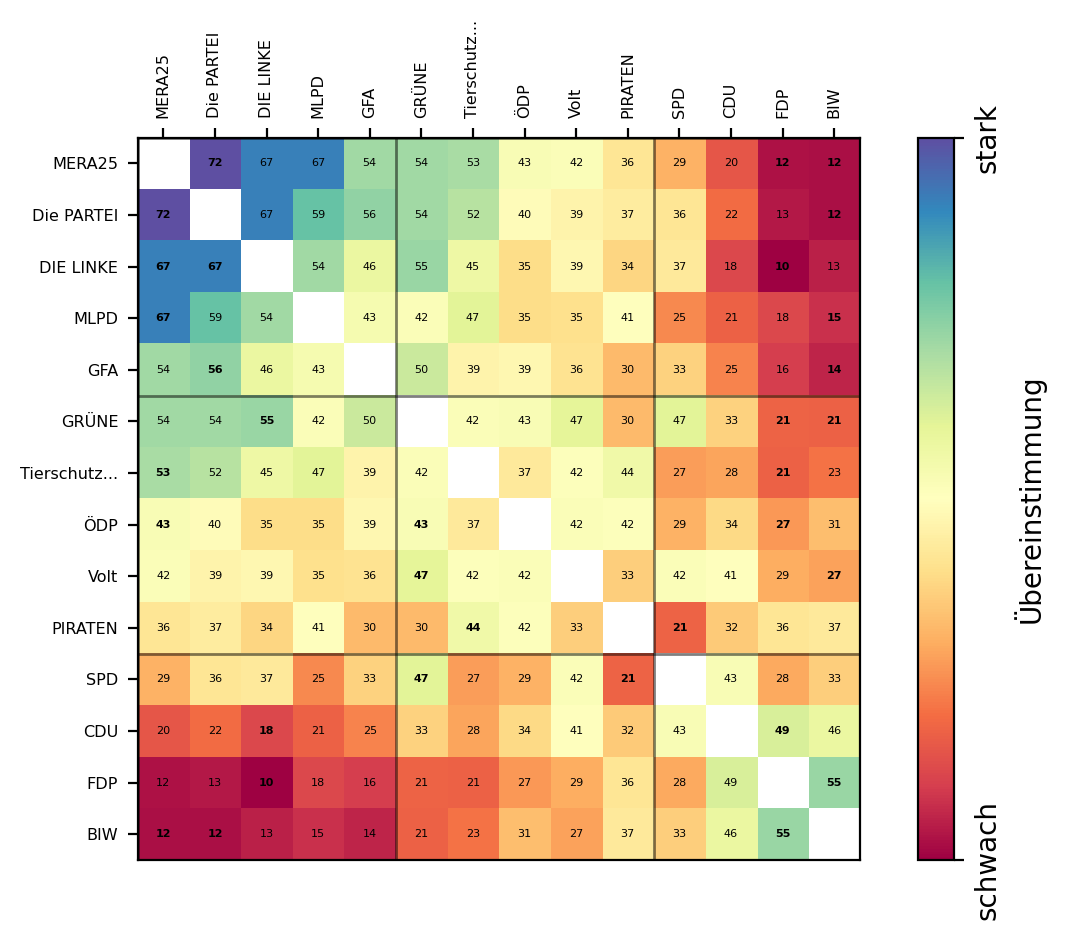

In [27]:
fig, ax = plt.subplots()
ax.set_aspect(1)
p = ax.matshow(norm, vmin=norm_min, vmax=norm_max, cmap="Spectral")
ax.set_xticks(np.arange(N_par))
ax.set_yticks(np.arange(N_par))
ax.set_xticklabels(np.array(parties_short)[i_sorted], rotation=90, fontsize="xx-small")
ax.set_yticklabels(np.array(parties_short)[i_sorted], fontsize="xx-small")
ticks = np.arange(0, N_par, 5)
ax.xaxis.tick_top()
ax.hlines(ticks-0.5, -0.5, N_komp-0.5, lw=1, color="black", alpha=0.5)
ax.vlines(ticks-0.5, -0.5, N_komp-0.5, lw=1, color="black", alpha=0.5)
cbar = plt.colorbar(p, ticks=[norm_min, norm_max])
cbar.set_label("Übereinstimmung")
cbar.set_ticklabels(["schwach", "stark"], rotation=90, va="center")
if True:
    for i in range(N_par):
        for j in range(N_par):
            if j==i:
                continue
            nmax = np.round(norm[np.where(np.isfinite(norm[:, j])), j].max(), 2)
            nmin = np.round(norm[np.where(np.isfinite(norm[:, j])), j].min(), 2)
            if np.round(norm[i, j], 2)==nmin or np.round(norm[i, j], 2)==nmax:
                fontweight="bold"
            else:
                fontweight="normal"
            ax.text(i, j, "{:.0f}".format(norm[i, j]*100), fontsize=4, va="center", ha="center", fontweight=fontweight)
fig.tight_layout()

## Zusätzliche Partei hinzufügen

Abschließend sei erwähnt, dass es auch nach Berechnung der Hauptkomponentenanalyse möglich ist, einen beliebigen Thesen-Vektor in die neuen Koordinaten zu überführen.

Hier am Beispiel eines zufällig generierten Vektors.

In [28]:
X_random = np.random.randint(-1, high=1, size=(1, N_the))
Y_random = pca.transform(X_random)

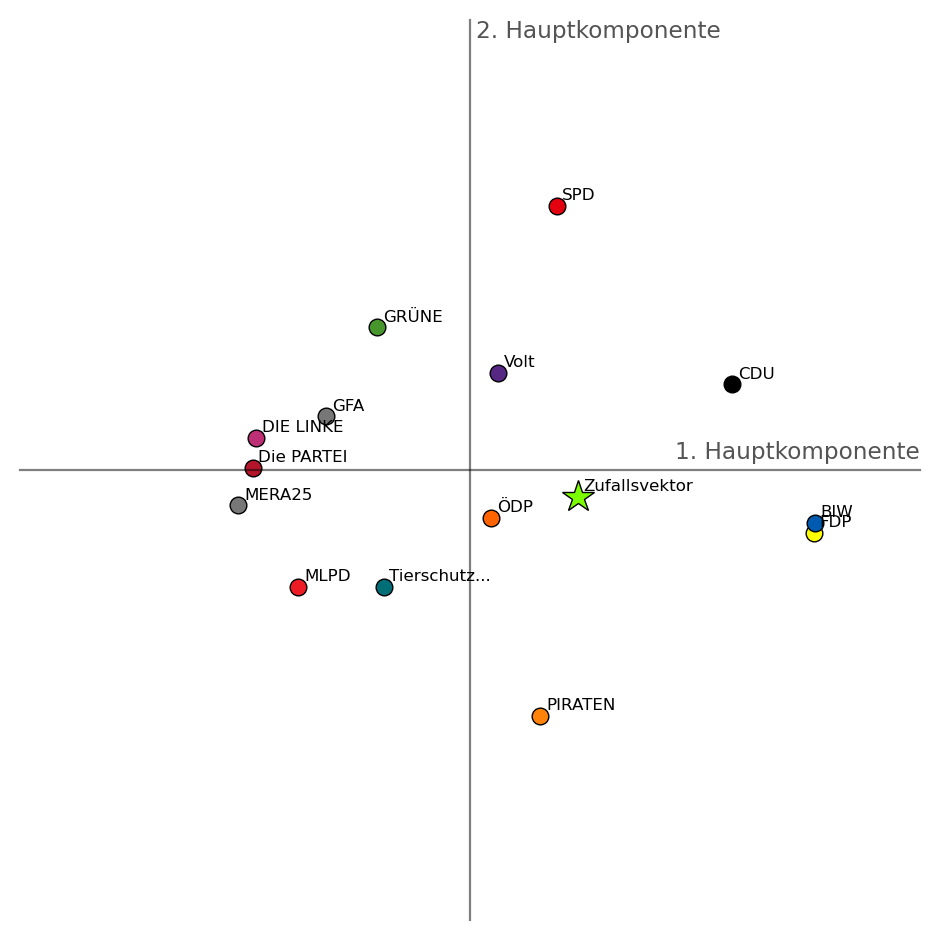

In [29]:
offset = 0.1
fig, ax = plt.subplots()
ax.set_aspect(1)
for i in range(N_par):
    ax.plot(Y[i, 0], Y[i, 1], "o", markersize=6, c=utils.color_dict[data.parties[i]], markeredgecolor="black", markeredgewidth=0.5)
    if True:
        ax.text(Y[i, 0]+offset, Y[i, 1]+offset, parties_short[i], fontsize=6)
ax.plot(Y_random[0, 0], Y_random[0, 1], "*", markersize=12, c="lawngreen", markeredgecolor="black", markeredgewidth=0.5)
ax.text(Y_random[0, 0]+offset, Y_random[0, 1]+offset, "Zufallsvektor", fontsize=6)
lim = np.ceil(np.abs(Y).max())+1
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.set_xticks([])
ax.set_yticks([])
if True:
    ax.spines["left"].set_position("zero")
    ax.spines["bottom"].set_position("zero")
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    ax.spines["left"].set_alpha(0.5)
    ax.spines["bottom"].set_alpha(0.5)
    ax.text(lim, 0.1, "1. Hauptkomponente", va="bottom", ha="right", fontsize="small", alpha=0.67)
    ax.text(0.1, lim, "2. Hauptkomponente", va="top", ha="left", fontsize="small", alpha=0.67)
else:
    ax.axis("off")
ax.set_xticklabels([])
ax.set_yticklabels([])
fig.tight_layout()